本教程主要分为两个部分：
1. 使用Sklearn处理数据集
2. 使用Sklearn训练模型

# 使用Sklearn处理数据集

使用sklearn的数据集API可以访问以下不同数据:

- 内置数据集
    - 标准小数据集（Toy datasets）：```load_NAME```
    - 图片数据 (Sample image): ```load_sample_images()```, ```load_sample_image()```
- 外部数据
    - 加载svmlight/libsvm所使用的数据集格式 ```load_svmlight_file```
    - 使用```pandas.io```, ```scipy.io```,```scipy.misc.imread```等工具从文件中读取数据集
    - 从[mldata.org](http://mldata.org/)下载相关数据
- 模拟数据集，可以为这些任务生成合成数据集：
    - 分类，聚类
    - 回归
    - 流型学习
    - 降维
    

## 内置的标准小数据集

内置的标准小数据集根据用途可以分为：
- 分类
    - 鸢尾花数据集: ```load_iris()```
    - 乳腺癌数据集: ```load_breast_cancer()```
    - 手写数字数据集: ```load_digits()```
    - 葡萄酒数据集: ```load_wine()```
- 回归
    - 波士顿房价数据集: ```load_boston()```
    - 糖尿病数据集: ```load_diabetes()```
    - 体能训练数据集: ```load_linnerud()```


### 鸢尾花数据集
    
鸢尾花的数据集，可用于多分类任务,通过使用```load_iris()```加载数据。

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
plt.style.use('seaborn')

In [2]:
#加载数据集
iris=load_iris()

# 通过keys查看数据集中的内容
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

查看数据集的标签

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

查看数据集的特征名称

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

数据集样本的数量和特征数目

In [5]:
n_samples,n_features=iris.data.shape

print('样本数量为：',n_samples)
print('特征数量为：',n_features)

样本数量为： 150
特征数量为： 4


数据集中不同类型花朵的分布

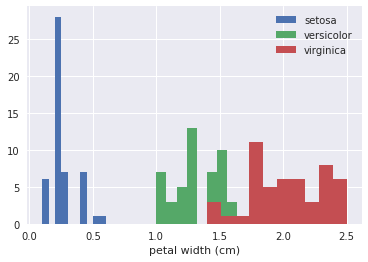

In [6]:
x_index=3
for label in range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label,x_index],label=iris.target_names[label])
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc="upper right")
plt.show()

不同花朵的花萼的长度和宽度的关系

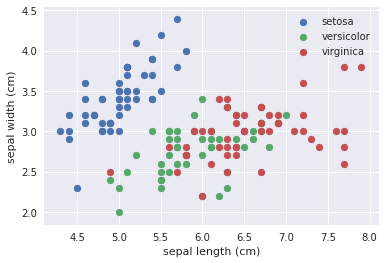

In [7]:
x_index=0
y_index=1
for label in range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target==label,x_index],
                iris.data[iris.target==label,y_index],
                label=iris.target_names[label])
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper right')
plt.show()

### 乳腺癌数据集


In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
breast_cancer = load_breast_cancer()

In [10]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
print("数据集中的特征有:{}".format(' '.join(breast_cancer['feature_names'])))
(rows, cols) = breast_cancer.data.shape
print("数据集的行数为:{},列数为:{}".format(rows, cols))

数据集中的特征有:mean radius mean texture mean perimeter mean area mean smoothness mean compactness mean concavity mean concave points mean symmetry mean fractal dimension radius error texture error perimeter error area error smoothness error compactness error concavity error concave points error symmetry error fractal dimension error worst radius worst texture worst perimeter worst area worst smoothness worst compactness worst concavity worst concave points worst symmetry worst fractal dimension
数据集的行数为:569,列数为:30


In [12]:
breast_cancer_pd = pd.DataFrame(data = np.c_[breast_cancer['data'],breast_cancer['target']],
                                columns = list(breast_cancer['feature_names']) + ['target'])

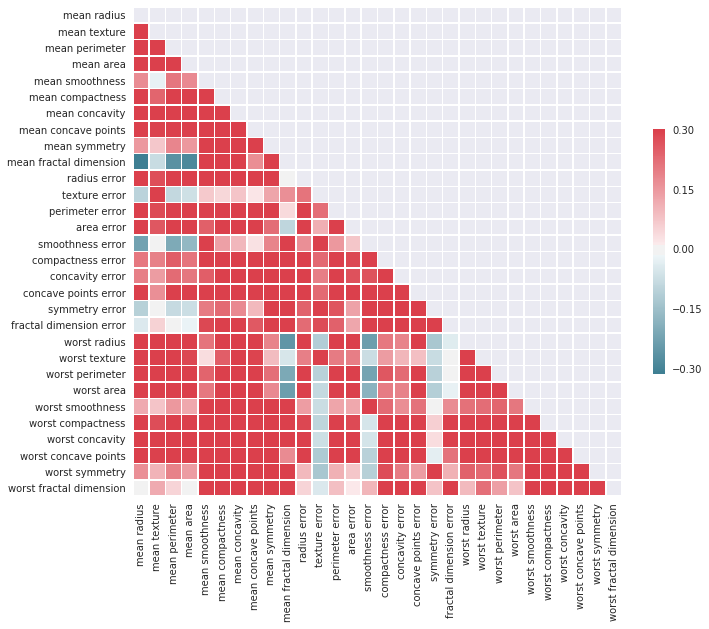

In [13]:
# Compute the correlation matrix
corr = breast_cancer_pd[list(breast_cancer['feature_names'])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 手写数字数据集

手写数字数据集可用于多分类任务，有从0到9的手写数字，共10分类

dogits_data_shape  (1797, 64)


<Figure size 432x288 with 0 Axes>

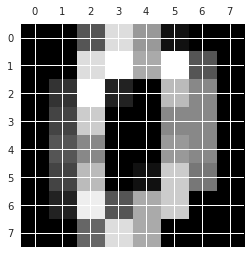

digits_image_shape  (1797, 8, 8)
True


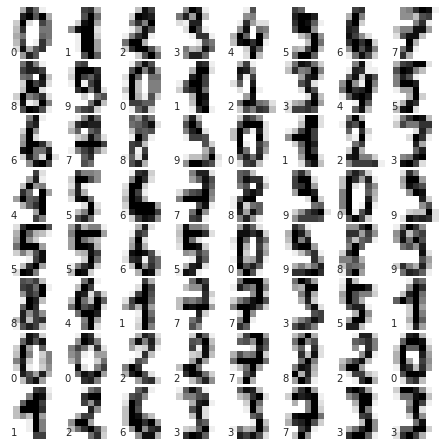

In [14]:
from sklearn.datasets import load_digits
digits=load_digits()
print('dogits_data_shape ',digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

from sklearn.datasets import load_digits
digits=load_digits()
digits.keys()
n_samples,n_features=digits.data.shape
print('digits_image_shape ',digits.images.shape)

import numpy as np
print(np.all(digits.images.reshape((1797,64))==digits.data))

fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
#绘制数字：每张图像8*8像素点
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    #用目标值标记图像
    ax.text(0,7,str(digits.target[i]))
plt.show()

### 波士顿房价数据集

In [15]:
# 读取数据集
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [16]:
print("数据集中的特征有:{}".format(' '.join(boston_dataset['feature_names'])))
(rows, cols) = boston_dataset.data.shape
print("数据集的行数为:{},列数为:{}".format(rows, cols))

数据集中的特征有:CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT
数据集的行数为:506,列数为:13


In [17]:
boston_df = pd.DataFrame(data=boston_dataset.data, 
                         columns = list(boston_dataset['feature_names']))

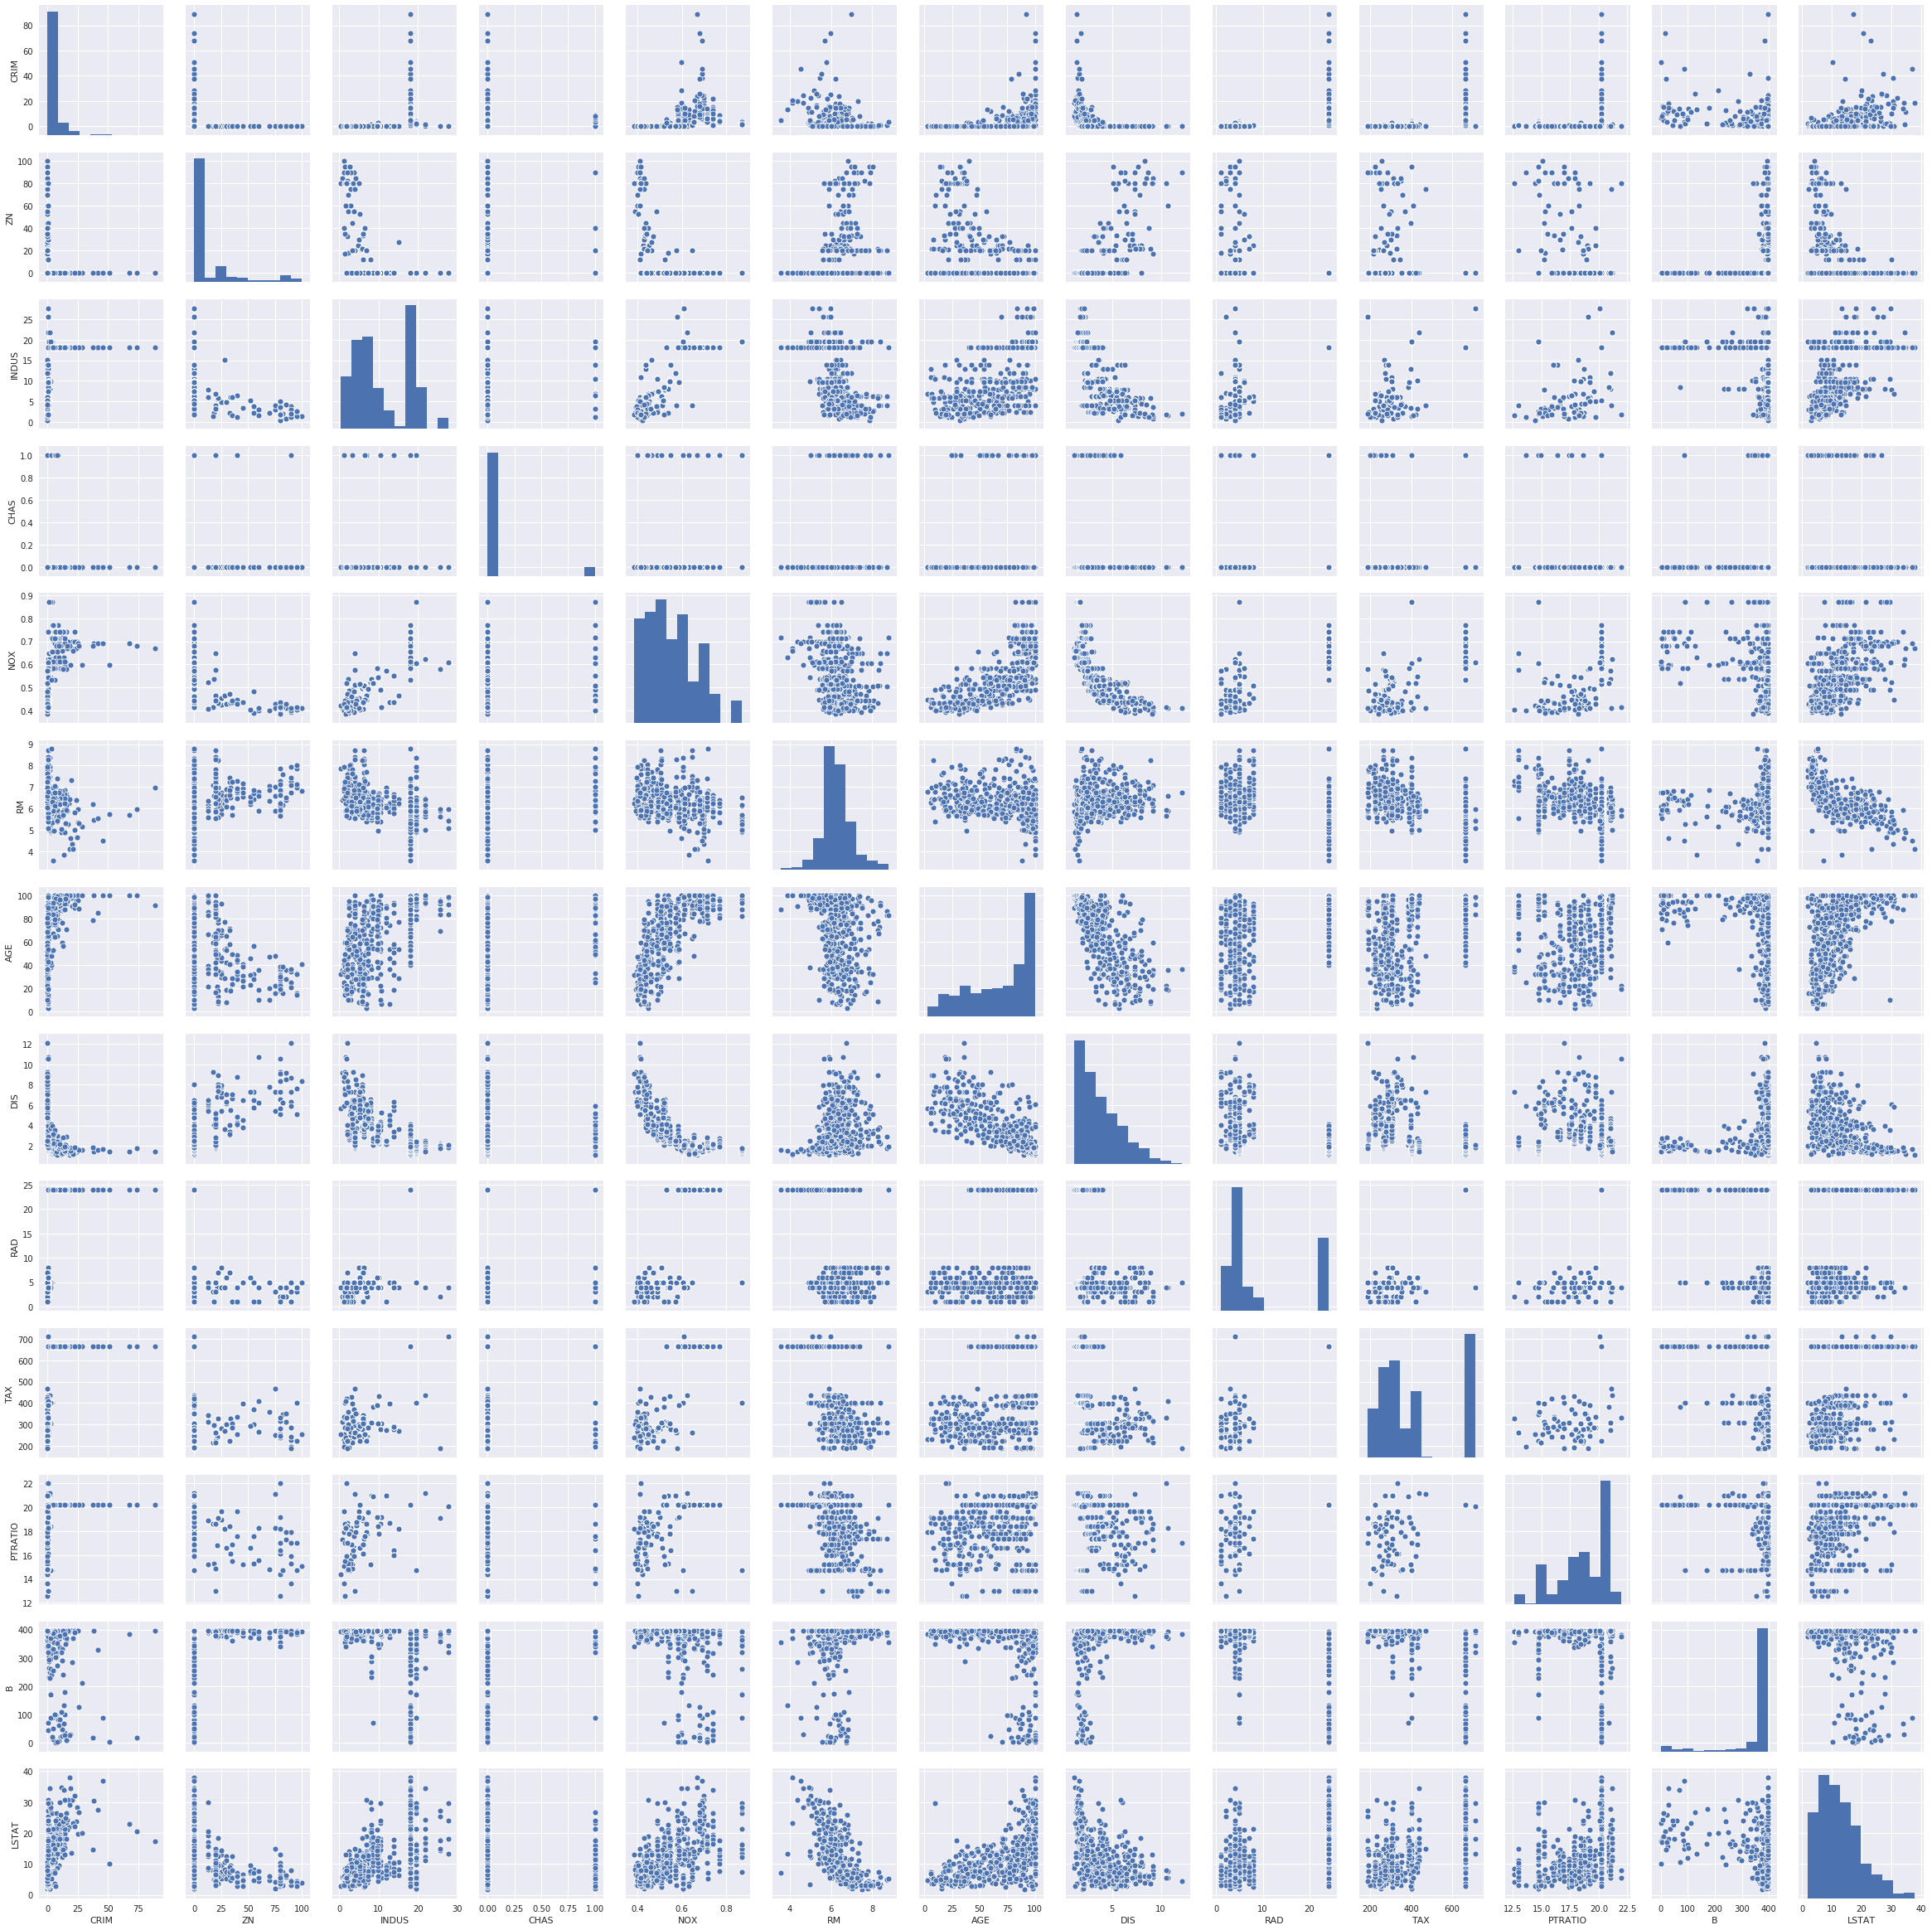

In [18]:
sns.pairplot(boston_df)

## 加载外部数据

以libsvm使用的数据为例：

In [19]:
from sklearn.datasets import load_svmlight_file
x_train,y_train=load_svmlight_file("data/train_induction.dat")

In [20]:
x_train.shape

(10, 9253)

In [21]:
y_train.shape

(10,)

## 生成模拟数据集

生成多类别单标签数据集

X.shape (200, 2)
labels {0, 1, 2}


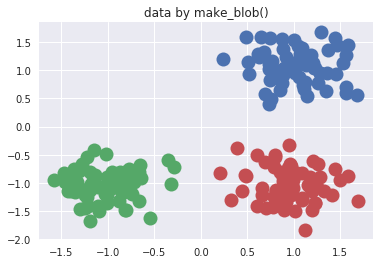

In [22]:
from sklearn.datasets.samples_generator import make_blobs
center=[[1,1],[-1,-1],[1,-1]]
cluster_std=0.3
X,labels=make_blobs(n_samples=200,centers=center,n_features=2,
                    cluster_std=cluster_std,random_state=0)
print('X.shape',X.shape)
print("labels",set(labels))

unique_lables=set(labels)
for k in unique_lables:
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markeredgecolor="k",
             markersize=14)
plt.title('data by make_blob()')
plt.show()



X.shape: (200, 2)
labels: {0, 1}


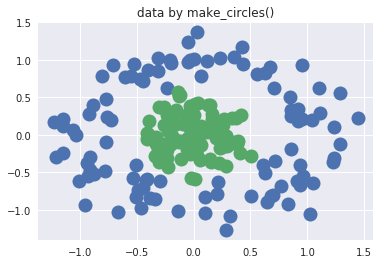

In [23]:
from sklearn.datasets.samples_generator import make_circles
X,labels=make_circles(n_samples=200,noise=0.2,factor=0.2,random_state=1)
print("X.shape:",X.shape)
print("labels:",set(labels))

unique_lables=set(labels)
for k in unique_lables:
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markeredgecolor="k",
             markersize=14)
plt.title('data by make_circles()')
plt.show()

# 使用Sklearn 训练模型

Sklearn中内置了多种模型，一般情况下使用Sklearn中自带模型的步骤分为一下步骤:
1. 加载数据
2. 建立模型
3. 训练
4. 验证模型


## 训练分类模型

以 Logistic Regression在iris 数据集上分类为例, 代码在classification_example.py中

## 训练回归模型

以 Support Vector Regression 在波士顿房价数据集上回归为例, 代码在regression_example.py中
